In [2]:
import numpy as np
import pandas as pd


In [3]:
data= pd.read_csv("../data/data_v5.4.csv")

In [4]:
data.job_title = data.job_title.apply(lambda x: x.lower().replace("#","").replace(":","").strip() if x is not np.nan else np.nan)

In [10]:
# craft position from the job post and remove it from the title
position = data.job_title.apply(lambda x: np.nan if x is np.nan else 1 if 'senior' in x else 2 if 'mid' in x else 3 if 'junior' in x else 0)

In [27]:
data.job_title = data.job_title.apply(lambda x: x.replace("senior","").replace("junior","").replace("mid","").strip() if x is not np.nan else np.nan)

In [28]:
data.job_title.nunique()

341

In [44]:
unified_job_titles = {'full-stack':['full stack', 'fullstack' ] ,
                     'front-end':['front end', 'frontend' ] ,
                     'back-end':['back end', 'backend','back_end'] }

def fix_job_title(title):
    
    for k,v in unified_job_titles.items():
        for kw in v:
            title = title.replace(kw,k)
    return title

In [395]:
def abstract_job_title(title):
    if title is np.nan:
        return title
    abstract_titles = {'full-stack':['full stack', 'fullstack', 'full-stack','(laravel + vue.js)','(laravel+vue.js)','flutter / laravel developer',
                                    'laravel and reactjs',] ,
                     'front-end':['front end', 'frontend','front-end','react js developer','react.js developer','reactjs developer',
                                 'vue.js developer','vue developer','front developer','angular developers'] ,
                     'back-end':['back end', 'backend','back_end', 'back-end','laravel developer','laravel php developer'],
                    'ui/ux designer' : ['ui/ux' , 'ux/ui', 'ui ' , 'ui\\ux' , 'ui-ux'],
                       '.net developer':['.net core developer' , '.net developer','.net server'],
                        'mobile app developer':['mobile app' , 'mobile ','moobile app','(mobile)', 'flutter developer','ios developer','android developer'],
                       'motion designer':["motion graphic designer","video graphic designer","motion graphics"],
                       'graphic designer':['graphic designer','graphic_designer','graphic designers'],
                       'social media manager':['social media','youtube channels manger','blog manager'],
                       'sales':['sales'],
                       'web developer': ['web developer' , 'web_developer','web/app developer','website developer',
                                         '_web_developer','web designer','web application developer','web developers'],
                       'software developer': ['software developer','software developers','softwaredeveloper'],
                       'digital marketing':['digital marketing manager','digital marketer','digital marketing executives','manager of marketing','marketing manager'],
                       'network and system administrator':['network & system administrator','network and system administrator',
                                                           'network & systems administrator','network and system auditor','networks & servers specialist'],
                       'accountant':['accounting manager','accountant','accountants','chief accountant'],
                       'quality assurance':['quality assurance','software quality','qa engineer','software_qa_tester','software qa tester',
                                            'software_manual_tester','software_tester','software test engineer','qa tester'],
                       'human resources':['hr officer','hr specialist','hr recruiter','human_resources','human resources'],
                       'content creator':['content' ,'copy writer','news editor' ],
                       'secretary' : ['secretary']
                      }
    sub = title
    for k,v in abstract_titles.items():
        for kw in v:
            if kw in sub:
                sub = k
                #print(sub)
    return sub

In [396]:
abstract_job_title('full stack software developer')

'full-stack'

In [397]:
data.job_title.apply(abstract_job_title).nunique()

170

In [392]:
data.job_title.apply(abstract_job_title).unique()

array(['/ developer', 'cashier', '.net developer',
       'operations department', 'awasol developer',
       'coaching scholarship', 'sales', 'graphic designer', 'front-end',
       'social media manager',
       'telecommunication engineers and information technology engineers',
       'back-end', 'full-stack', 'ui/ux designer', 'python developer',
       'react native developer', 'mobile app developer',
       'delivery center coordinator', nan, 'business analyst',
       'devops and system administrator', 'developer',
       'wordpress developer, seo & digital marketing specialist',
       'academic supervisor (tesol)', 'network administrator',
       'help desk',
       'timecoder of tv programs, translation quality controller',
       'software developer', 'quality assurance', 'erp developer',
       'java developer', 'accountant', 'web developer',
       'network and system administrator', 'system analyst',
       'system engineer', 'developers', 'motion designer',
       'execu

In [50]:
data.job_title.unique()

array(['/ developer', 'cashier', '.net developer',
       'operations department', 'awasol developer',
       'coaching scholarship', 'sales and marketing executive',
       'graphic designer', 'front-end developer & wordpress',
       'social media specialist',
       'telecommunication engineers and information technology engineers',
       'laravel developer', 'full stack developer', 'ui/ux designer',
       'full-stack js developer', 'front-end developer',
       'backend developer', 'python developer', 'react native developer',
       'flutter developer', 'delivery center coordinator',
       'full-stack developer', 'front end reactjs developer', nan,
       'front-end js developer', 'business analyst', 'android developers',
       'devops and system administrator', 'developer',
       'wordpress developer, seo & digital marketing specialist',
       'academic supervisor (tesol)', 'network administrator',
       'help desk',
       'timecoder of tv programs, translation quality co

In [205]:
abstract_job_title("full-stack web developer")

'full-stack'

In [393]:
data.loc[data.job_title.notna() & data.job_title.str.contains('test')].job_title.apply(abstract_job_title).unique()

array(['quality assurance', 'software test engineer',
       'web penetration tester', 'tawasol tester', 'tester', 'full-stack',
       'qa tester'], dtype=object)

In [384]:
data.loc[data.job_title.notna() & data.job_title.str.contains('front developer')].skills.values

array(['html5, css3, typescript, javascript frameworks (angular 2+ and query), configuration management, client-side building, cross-browser compatibility, partial page updates, ajax, asynchronous request handling, seo principles, wordpress, oral and written communication skills, interpersonal skills, problem-solving skills, code versioning tools (git), challenging mentality, self-motivated, agile methodology, scrum.'],
      dtype=object)

In [398]:
for v in data.loc[data.job_title.notna() & data.job_title.str.contains('test')].job_title.unique():
    print(v," ::" , abstract_job_title(v))

software testing and quality assurance  :: quality assurance
software_tester  :: quality assurance
software test engineer  :: quality assurance
web penetration tester  :: web penetration tester
software_manual_tester  :: quality assurance
quality assurance & testing specialist  :: quality assurance
software qa tester  :: quality assurance
software_qa_tester  :: quality assurance
tawasol tester  :: tawasol tester
tester  :: tester
full-stack engineer,  backend engineer, software tester, product owner  :: full-stack
qa tester  :: quality assurance


In [46]:
fix_job_title("backend/frontend developers")

'back-end/front-end developers'

In [47]:
data.job_title.nunique()

341

In [49]:
data.loc[data.job_title.notna()].job_title.apply(fix_job_title).nunique()

331

In [29]:
data.loc[data.job_title.notna()].job_title.apply(lambda x: print(x) if x and 'front' in x else 0)

front-end developer & wordpress
front-end developer & wordpress
front-end developer
front end reactjs developer
front-end js developer
front-end developer
backend/frontend developers
backend/frontend developers
backend/frontend developers
front-end tech lead
front-end developer & wordpress
frontend developer
front-end developer & wordpress
frontend developer
front-end developer
frontend web developer
frontend developer
front-end developer
frontend developer flutter developer
frontend developer
frontend web developer
front-end developer
front-end web developer
front-end developer
front-end js developer
android developer, web developer, front-end developer
frontend web developer
frontend developer
front-end developer with reactjs experience
frontend engineer
frontend engineer
front-end developer
frontend engineer
front-end developer
front-end developer
frontend developer
front end developer (react)
full stack developer & front end developer
frontend developer, react js
front end develope

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
869    NaN
870    0.0
871    0.0
873    0.0
875    0.0
Name: job_title, Length: 832, dtype: float64

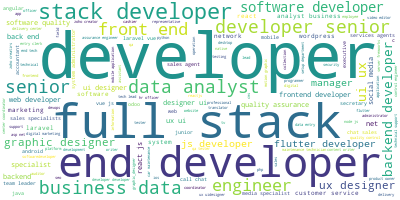

In [6]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data.loc[data.job_title.notna()].job_title.values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()